## Курсовой проект Python для анализа данных

### Загрузка данных

<p>Перед решением задачи классификации на приведенном наборе данных предлагается нормализовать данные. Датасет доступен для скачивания в формате CSV. В данном случае удобно использовать библиотеку Pandas для загрузки данных.</p>

In [356]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


num_classes = 10
batch_size = 128
epochs = 20
verbose = 0

fashion_mnist_train = pd.read_csv('fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('fashion-mnist_test.csv')

X_train = np.array(fashion_mnist_train.drop(columns=['label']))
y_train = np.array(fashion_mnist_train['label'])

X_test = np.array(fashion_mnist_test.drop(columns=['label']))
y_test = np.array(fashion_mnist_test['label'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### 1. Логистическая регрессия

<p>Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Поэтому рекомендуется использовать tensorflow или keras для выполнения этого задания. Используйте стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.</p>
<p>По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать softmax.</p>
<p>Обучите логистическую регрессию на тренировочной выборке и оцените качество на тестовой выборке используя метрику accuracy. Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.</p>

In [357]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

data = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_test, y_test)
)

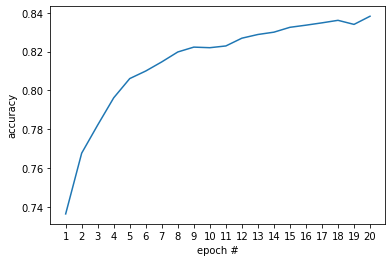

In [358]:
x = range(1, epochs+1)

y = data.history['val_acc']

plt.plot(x, y)
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.xticks(x)

plt.show()

In [359]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
round(acc, 3)

0.838

### 2. Полносвязная нейронная сеть

<p>Далее, попробуйте реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучите модель и посчитайте качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?</p>

In [360]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

data = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_test, y_test)
)

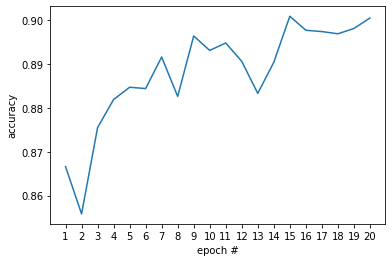

In [361]:
x = range(1, epochs+1)

y = data.history['val_acc']

plt.plot(x, y)
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.xticks(x)

plt.show()

In [362]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
round(acc, 3)

0.9

<p><i>Как видим, результат чуть лучше чем у логистической регресии, я могу объяснить это тем, что данная сеть более сложная и имеет большее количество слоёв.</i><p>

### 3. Сверточная нейронная сеть

<p>После этого вам предлагается реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют keras или tensorflow.</p>
<p>Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например Max Pooling слои. Они понижают размерность сходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.</p>
<p>Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.</p>
<p>В заключение, рекомендуется попробовать добавить Batch Normalization слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.</p>

In [363]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=3, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

data = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_test, y_test)
)

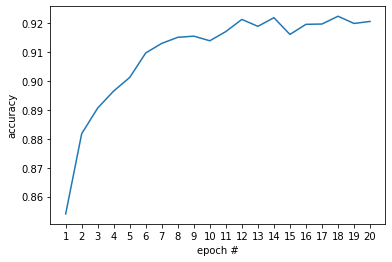

In [364]:
x = range(1, epochs+1)

y = data.history['val_acc']

plt.plot(x, y)
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.xticks(x)

plt.show()

In [365]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
round(acc, 3)

0.921

#### Добавляем больше слоев

In [366]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=3, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=3))
model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

data = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_test, y_test)
)

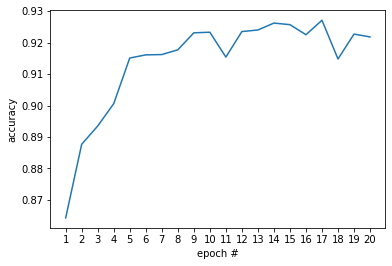

In [367]:
x = range(1, epochs+1)

y = data.history['val_acc']

plt.plot(x, y)
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.xticks(x)

plt.show()

In [368]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
round(acc, 2)

0.92

<p><i>Результат не изменился.</i></p>

#### Добавляем Batch Normalization слои

In [372]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(32, activation='relu', kernel_size=3, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization()) # 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Convolution2D(64, activation='relu', kernel_size=3))
model.add(tf.keras.layers.BatchNormalization()) # 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization()) # 3
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

data = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_test, y_test)
)

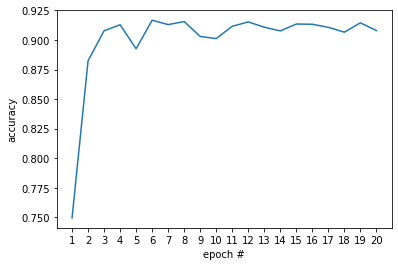

In [373]:
x = range(1, epochs+1)

y = data.history['val_acc']

plt.plot(x, y)
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.xticks(x)

plt.show()

In [374]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
round(acc, 2)

0.91

<p><i>Качество модели ухудшилось, но не значительно.</i></p>